Let's look at the catalogs generated by the corrected vs. uncorrected diffims...

In [13]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

class sizeme():
    """ Class to change html fontsize of object's representation"""
    def __init__(self,ob, size=50, height=120):
        self.ob = ob
        self.size = size
        self.height = height
    def _repr_html_(self):
        repl_tuple = (self.size, self.height, self.ob._repr_html_())
        return u'<span style="font-size:{0}%; line-height:{1}%">{2}</span>'.format(*repl_tuple)

pd.options.display.max_columns = 999

Let's try to make the plot in Colin's DMTN-006 -- first run his script

```
python forcePhotDiaSources.py decamDirTest --output decamDirTest/ --id visit=289820 ccdnum=11 --templateId visit=288976 --no-versions
```

then...

In [15]:
import lsst.daf.persistence as dp
butler=dp.Butler('decamDirTest')
sources=butler.get('forced_src',visit=289820,ccdnum=11)
df = pd.DataFrame({col: sources.columns[col] for col in sources.schema.getNames()})
print df.shape, df.classification_dipole.values.sum()
sizeme(df.head())

(50, 17) 7


,base_PsfFlux_flag,base_PsfFlux_flag_edge,base_PsfFlux_flag_noGoodPixels,base_PsfFlux_flux,base_PsfFlux_fluxSigma,base_TransformedCentroid_flag,base_TransformedCentroid_x,base_TransformedCentroid_y,classification_dipole,coord_dec,coord_ra,diffim_base_PsfFlux_flux,diffim_base_PsfFlux_fluxSigma,objectId,parentObjectId,template_base_PsfFlux_flux,template_base_PsfFlux_fluxSigma
0,False,False,False,11402.671047,89.060454,False,1397.283325,36.974789,0,-0.104245,2.715689,NaN,NaN,124476789417312318,0,12966.984661,82.876483
1,False,False,False,17276.202225,148.566598,False,762.302063,81.918633,0,-0.103438,2.715746,-968.636060,179.460633,124476789417312319,0,19549.001016,93.088274
2,False,False,False,7450.233416,79.866487,False,461.621613,167.564728,0,-0.103056,2.715855,540.772368,115.619059,124476789417312320,0,6738.646987,67.922069
3,False,False,False,41713.357043,125.714742,False,612.939148,208.854706,0,-0.103248,2.715908,935.644564,189.519786,124476789417312321,0,39815.460800,122.876648
4,False,False,False,18078.089417,101.525175,False,780.099426,412.828247,0,-0.103460,2.716169,1237.202307,153.359418,124476789417312322,0,18540.504999,155.166339


In [4]:
df[['base_PsfFlux_flux', 'template_base_PsfFlux_flux']].head()
df['s_to_n'] = df.base_PsfFlux_flux / df.base_PsfFlux_fluxSigma
df['template_s_to_n'] = df.template_base_PsfFlux_flux / df.template_base_PsfFlux_fluxSigma
print df.columns.values
df[['s_to_n', 'template_s_to_n']].head()

['base_PsfFlux_flag' 'base_PsfFlux_flag_edge'
 'base_PsfFlux_flag_noGoodPixels' 'base_PsfFlux_flux'
 'base_PsfFlux_fluxSigma' 'base_TransformedCentroid_flag'
 'base_TransformedCentroid_x' 'base_TransformedCentroid_y'
 'classification_dipole' 'coord_dec' 'coord_ra' 'diffim_base_PsfFlux_flux'
 'diffim_base_PsfFlux_fluxSigma' 'objectId' 'parentObjectId'
 'template_base_PsfFlux_flux' 'template_base_PsfFlux_fluxSigma' 's_to_n'
 'template_s_to_n']


,s_to_n,template_s_to_n
0,-0.000135,1.397713
1,-3.496176,2.134968
2,127.826420,156.197557
3,-4.371655,2.037817
4,-2.538952,2.884991


Make a plot similar to Colin's [Figure 6 in DMTN-006](http://dmtn-006.lsst.io/en/latest/#forcephot-sci-template-v197367)

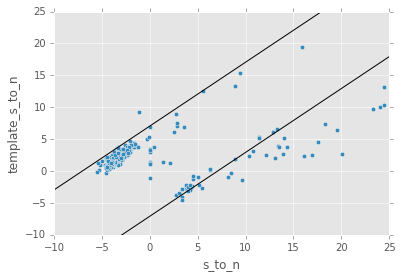

In [12]:
df.plot.scatter('s_to_n', 'template_s_to_n')
plt.xlim(-10, 25)
plt.ylim(-10, 25)
x = np.linspace(-25,25)
plt.plot(x, x-5*np.sqrt(2), 'k-')
plt.plot(x, x+5*np.sqrt(2), 'k-')